- Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.

In [1]:
#Importing The Packeges:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the DataSet:-

df = pd.read_csv("HeartDisease (1).csv")
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


- age :- Age in Year.
- sex :- 1:Male , 0:Female.
- BP  :- Blood Pressure.
- cholestrol :- Serum Cholestrol.

# About DataSet:-

- This dataset gives the information realated to heart disease. Dataset contain 5 columns, target is the class variable which is affected by other 4 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning default algorithm and findout which algorithm suitable for this dataset.

In [3]:
#TO check the shape of the DataSet:-

df.shape

(270, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
#Check basic statistics for each columns:-

df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [6]:
#Finding null values columns:-

df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [7]:
# To check there is imblance in DataSet:-

df["heart disease"].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

- There are 120 person which have no heart Disease And 150 have heart Disease.

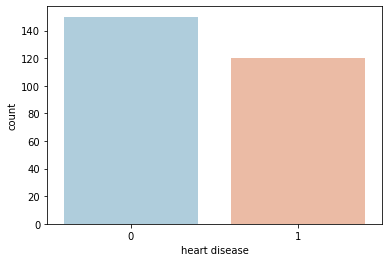

In [8]:
#EDA:-

sns.countplot(x="heart disease",palette="RdBu_r",data=df)
plt.show()

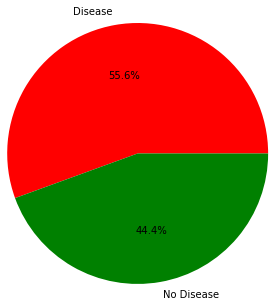

In [9]:
# For Better Visual representation with Pie Chart:-

plt.pie(df['heart disease'].value_counts(), labels=['Disease','No Disease'], colors=['red','green'], autopct='%1.1f%%', radius=1.5)
plt.show()

In [10]:
#Count Male Or Female In The Dataset:-

df.sex.value_counts()

1    183
0     87
Name: sex, dtype: int64

- After analysing sex value there is 183 Male And 87 Female in the Dataset:-

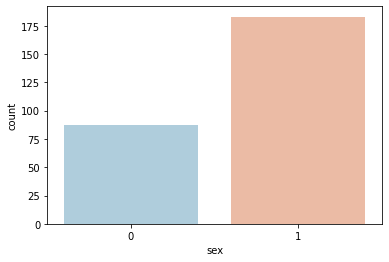

In [11]:
#Visual representation with countplot:-

sns.countplot(x="sex", data=df, palette='RdBu_r')
plt.show()

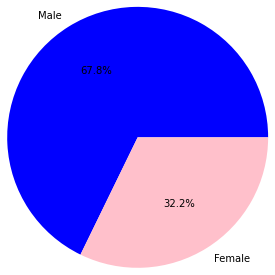

In [12]:
# For Better Visual representation with Pie Chart:-

plt.pie(df['sex'].value_counts(), labels=['Male','Female'], colors=['blue','pink'], autopct='%1.1f%%',radius=1.5)
plt.show()

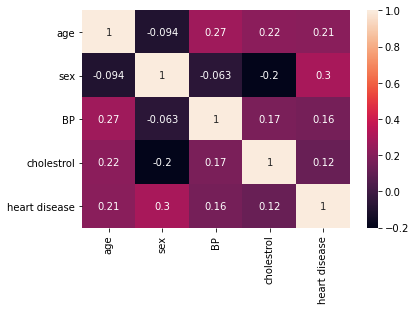

In [13]:
# To check the correlation with the help of Heatmap:-

sns.heatmap(df.corr(), annot =True)
plt.show()

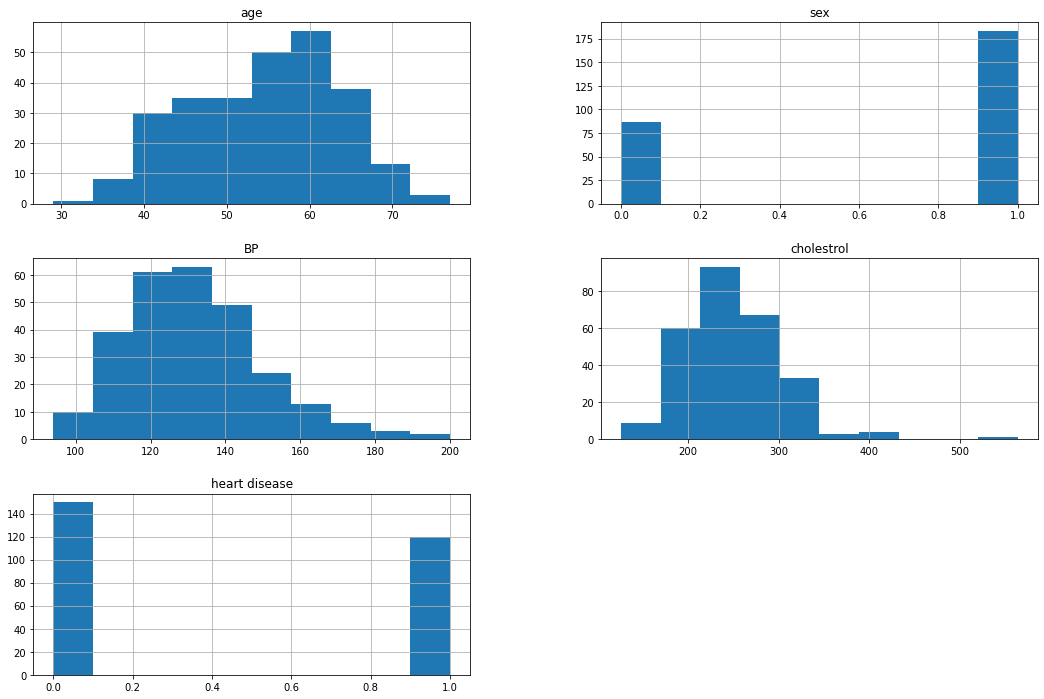

In [14]:
# To check distribution of data and identify outliers:-

df.hist(figsize=(18,12))
plt.show()

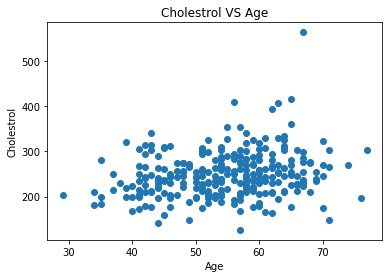

In [15]:
#Using Scatter Plot Between Cholestrol And Age:-

plt.scatter(x="age",y="cholestrol",data=df)
plt.title("Cholestrol VS Age")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.show()

# Separation of X and Y.

In [16]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

- Once you have X And Y you will do train test split.

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

- Importing all the necessary models:-

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.svm import SVC
svc = SVC()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

- Here i am using all the models to check the Accuracy and find which model provide us best accuracy for this kind of DataSet.

-  Importing Evaluation Metrics:-

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
# Defining a Function:-

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(f"Accuracy :- {accuracy_score(ytest,ypred)}")
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))
    return model

In [21]:
mymodel(logreg)

Accuracy :- 0.7037037037037037
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        31
           1       0.68      0.57      0.62        23

    accuracy                           0.70        54
   macro avg       0.70      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54

[[25  6]
 [10 13]]


LogisticRegression()

In [22]:
mymodel(knn)

Accuracy :- 0.6481481481481481
              precision    recall  f1-score   support

           0       0.75      0.58      0.65        31
           1       0.57      0.74      0.64        23

    accuracy                           0.65        54
   macro avg       0.66      0.66      0.65        54
weighted avg       0.67      0.65      0.65        54

[[18 13]
 [ 6 17]]


KNeighborsClassifier()

In [23]:
mymodel(svc)

Accuracy :- 0.6481481481481481
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        31
           1       0.70      0.30      0.42        23

    accuracy                           0.65        54
   macro avg       0.67      0.60      0.59        54
weighted avg       0.66      0.65      0.61        54

[[28  3]
 [16  7]]


SVC()

In [24]:
mymodel(dtc)

Accuracy :- 0.6111111111111112
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        31
           1       0.54      0.61      0.57        23

    accuracy                           0.61        54
   macro avg       0.61      0.61      0.61        54
weighted avg       0.62      0.61      0.61        54

[[19 12]
 [ 9 14]]


DecisionTreeClassifier()

In [25]:
mymodel(rfc)

Accuracy :- 0.6851851851851852
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        31
           1       0.61      0.74      0.67        23

    accuracy                           0.69        54
   macro avg       0.69      0.69      0.68        54
weighted avg       0.70      0.69      0.69        54

[[20 11]
 [ 6 17]]


RandomForestClassifier()

- After analysing all the default models, We wiil tell that the best model for Heart Disease DataSet is Logistic Regression And Random Forest Classifier beacause they give us best accuracy among all.

. BEST SCORES 
-  LOGISTIC REGRESSION HAVE 70% OF ACCURACY.
-  DECISION TREE CLASSIFIER HAVE 61% OF ACCURACY.
-  RANDOM FOREST CLASSIFIER HAVE 69% OF ACCURACY.
-  SUPPORT VECTOR CLASSIFIER HAVE 65% OF ACCURACY.
-  K-NEAREST NEIGHBORS HAVE 65% OF ACCURACY.

# Conclusion

In [26]:
- Exercise induced angina, Chest pain is major symptoms of heart attack.
- Logistic Regression default model Have best accuracy among all other models.
- K-Nearest Neighbors have worsr

SyntaxError: invalid syntax (<ipython-input-26-b480aab02651>, line 1)